# Coding Tutorial 4: Data Visualisation

In this coding tutorial, we go through the basic building blocks of a `matplotlib` figure, and then review how to combine this with `seaborn` visuals.

In [18]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

%matplotlib inline

In [5]:
bes_df = pd.read_feather("../Week2/data/bes_data_full_week2.feather")

## Figure

The `figure` is the top-level container for your visual. Its methods are concerned with high-level properties, such as:

- Figure-level title (`suptitle`)
- Subplot spacing (`subplots_adjust`)
- Saving to file (`savefig`)

It can be created using the `plt.figure()` function, but I prefer to use a different method.

In [ ]:
f = plt.figure()

## Subplots

The subplot(s) are the individual "grids" that the visuals are created on.

I prefer to create the subplots and figure using the single command: `plt.subplots()`

### `plt.subplots()`

This function takes two (three) arguments:

- `n_rows`: integer
- `n_columns`: integer
- `figsize`: (optional), numeric tuple of (width, height). Values are hundreds of pixels.

And returns two objects:

- The figure, which we should assign to `f`
- If `n_rows` $\times$ `n_columns` = 1, the axes object for the sole subplot is returned.
- If `n_rows` $\times$ `n_columns` > 1, then a numpy `ndarray` of axes is returned.

In [ ]:
f, ax = plt.subplots(1, 1, figsize=(15, 8)) # 1 subplot, 1500x800 pixels

In [ ]:
f, ax = plt.subplots(2, 1, figsize=(15, 8)) # 2 subplots, arranged 2 rows 1 col, 1500x800 pixels

In [ ]:
f, ax = plt.subplots(2, 3, figsize=(8, 12)) # 6 subplots, arranged 2 rows and 3 cols, 800x1200 pixels

Before we go on, here's the first of seaborn's convenient functions:

In [ ]:
sns.set_style('darkgrid') # darkgrid, whitegrid, dark, white, ticks

### Accessing Subplots

Any plotting function you call will by default be assigned to the last "active" subplot.

This behaviour can be unpredictable, so when we have more than one subplot we want to be able to explicitly access it.

The `numpy.ndarray` created by the `plt.subplots` function can be accessed with the following syntax: `ax[row][col]`

In [ ]:
f, ax = plt.subplots(3, 3, figsize=(12, 12))

ax[0][0].set_title("This is subplot (0, 0)", color="r")
ax[1][0].set_title("This is subplot (1, 0)", color="r")
ax[2][1].set_title("This is subplot (2, 1)", color="r")

In [ ]:
# This can be simplified greatly with a for-loop

f, ax = plt.subplots(3, 3, figsize=(12, 12))

for row in range(3):
    for col in range(3):
        ax[row][col].set_title(f"This is subplot ({row}, {col})")
        

Of course, if there is just one subplot we don't need to use indexers.

In [ ]:
f, ax = plt.subplots()

ax.set_title("This is the only subplot")

## Adding Graphical Elements

Now we get to the fun part: actually adding the visuals to our graphs. We begin with the two simplest elements:

- Dots (`ax.scatter`)
- Lines (`ax.plot`)

### `ax.scatter`

The `scatter` function requires at a minimum, the x- and y- coordinates of the dots it should be creating.

This should be passed as two equal-length vectors (i.e. columns in a dataframe).

In [64]:
# Let's generate some random data

x = np.random.normal(0, 1, 100) # 100 draws from standard normal
y = np.random.normal(0, 1, 100) 

df = pd.DataFrame({'x':x, 'y':y})

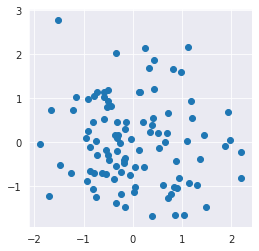

In [65]:
f, ax = plt.subplots(1, 1, figsize=(4, 4))
ax.scatter(x=df['x'], y=df['y'])

Here's a good point to bring up the first useful function from seaborn: `set_style`.

In [23]:
sns.set_style('darkgrid')

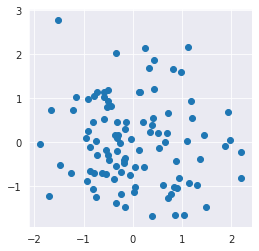

In [66]:
f, ax = plt.subplots(1, 1, figsize=(4, 4))
ax.scatter(x=df['x'], y=df['y'])

`scatter` can take parameters for:

- size: `s`
- color: `c`
- marker shape: `marker` (See `matplotlib.markers` for more information about marker styles.)
- transparency: `alpha`, numeric between 0 and 1

The above parameters can either be a single (scalar) value, or a vector of values equal in length to `x` and `y`

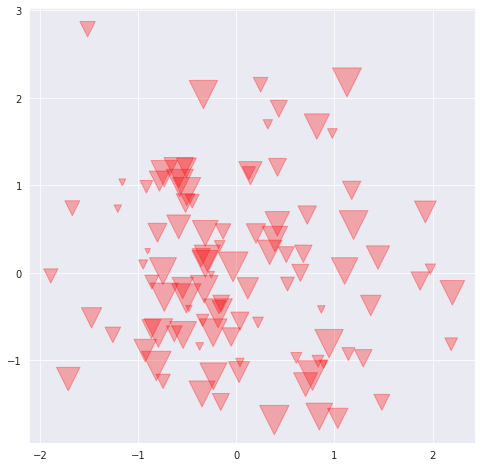

In [67]:
df['s'] = np.random.randint(10, 900, 100)

f, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.scatter(x=df['x'], y=df['y'], s=df['s'], c='red', marker="v", alpha=0.3)

`ax.plot`

The `plot` function creates a line. Similar to `scatter`, it takes vectors of x- and y- coordinates as inputs, but _the sequence of the values determines the path of the line_.

The following parameters can also be passed to customise the line:

- line style: `ls`, a string (`--`, `-.`, and so on. See the documentation for a full list).
- line width: `lw`, a numeric value
- color: `color`, a string
- markers at each point: `marker`, same as scatter
- transparency: `alpha`, numeric, between 0 and 1

In [68]:
df['x1'] = np.linspace(0, 10, len(y))

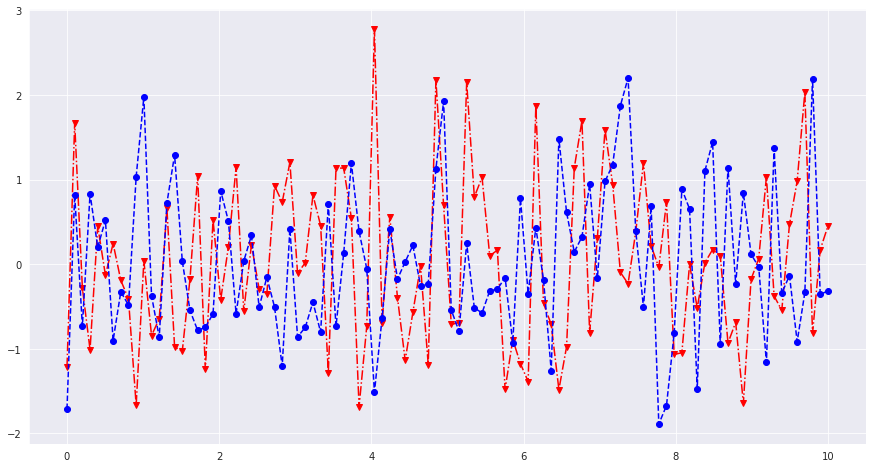

In [73]:
f, ax = plt.subplots(1, 1, figsize=(15, 8))
ax.plot(df['x1'], df['y'], color='r', marker='v', ls='-.')
ax.plot(df['x1'], df['x'], color='b', marker='o', ls='--')

### `ax.legend`

Usually plotting functions will have a `label` parameter. By assigning these, you can automatically generate a legend with `ax.legend()`.

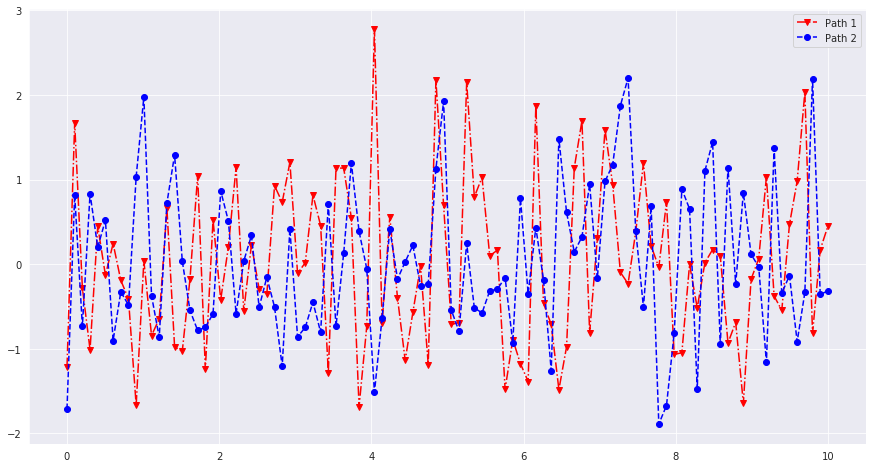

In [75]:
f, ax = plt.subplots(1, 1, figsize=(15, 8))
ax.plot(df['x1'], df['y'], color='r', marker='v', ls='-.', label="Path 1")
ax.plot(df['x1'], df['x'], color='b', marker='o', ls='--', label="Path 2")
ax.legend()

Let's bring a few of these things together.

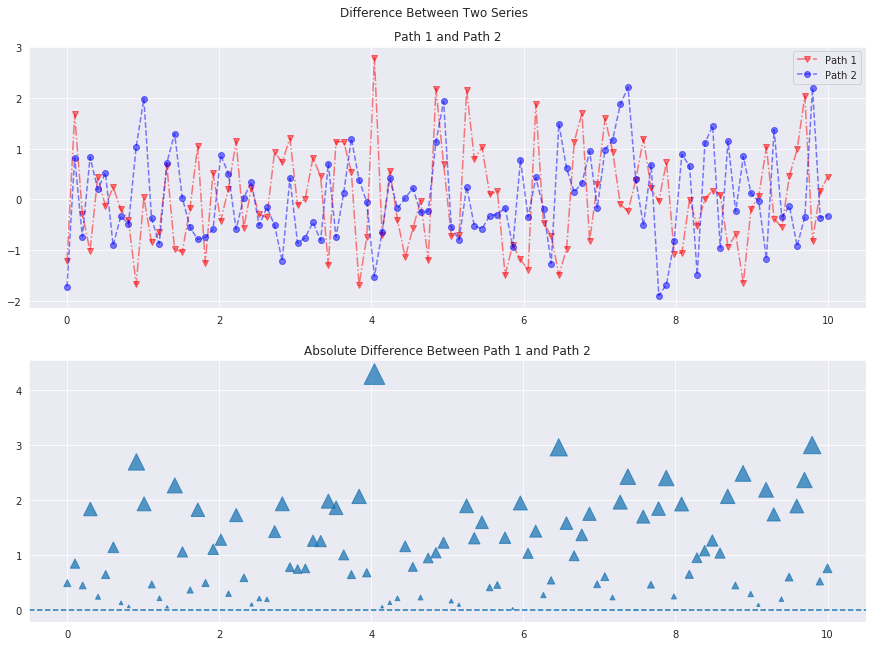

In [91]:
f, ax = plt.subplots(2, 1, figsize=(15, 10))
f.suptitle("Difference Between Two Series")
f.subplots_adjust(top=0.925)

ax[0].set_title("Path 1 and Path 2")
ax[0].plot(df['x1'], df['y'], color='r', marker='v', ls='-.', label="Path 1", alpha=0.5)
ax[0].plot(df['x1'], df['x'], color='b', marker='o', ls='--', label="Path 2", alpha=0.5)
ax[0].legend()
ax[1].set_title("Absolute Difference Between Path 1 and Path 2")
ax[1].scatter(df['x1'], abs(df['y']-df['x']), s=100*abs(df['y']-df['x']), marker='^', alpha=0.75)
ax[1].axhline(0, ls='--')

## Seaborn

Seaborn is a library built on top of `matplotlib` that provides a lot of amazing and easy-to-use plots.

We're going to go through some of my favourite:

- `sns.distplot`: General 1-D distributions
- `sns.boxplot`: Box-and-whiskers plot
- `sns.barplot`: Barplot. Nicer than the `matplotlib` implementation.

### `sns.distplot`

This combines three commonly-used visualisations for 1-D distributions:

- Histogram
- Kernel Density Estimate
- Rugplot

By default, only the histogram and KDE are shown. This behaviour can be altered with (`hist`, `kde`, `rug` being set to `True` or `False`).

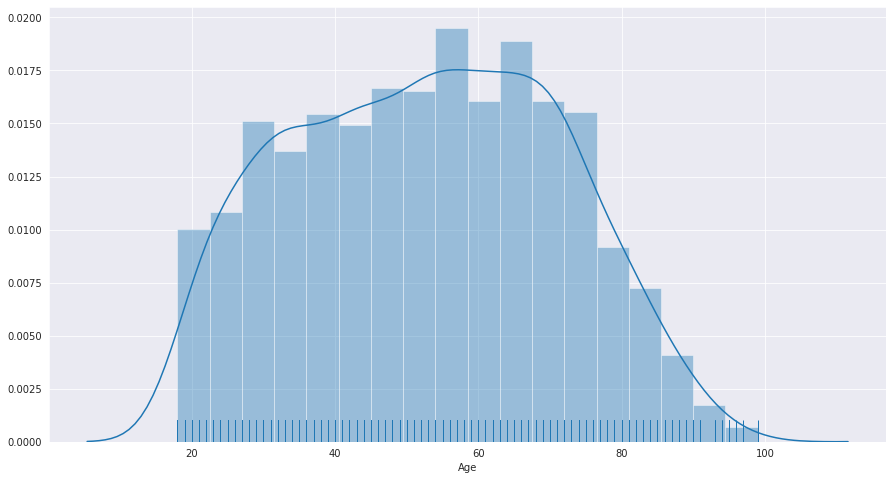

In [98]:
f, ax = plt.subplots(1, 1, figsize=(15, 8))
sns.distplot(bes_df['Age'].dropna(), rug=True, ax=ax)

Text(0.5, 1.0, 'Age Distribution of BES by Gender')

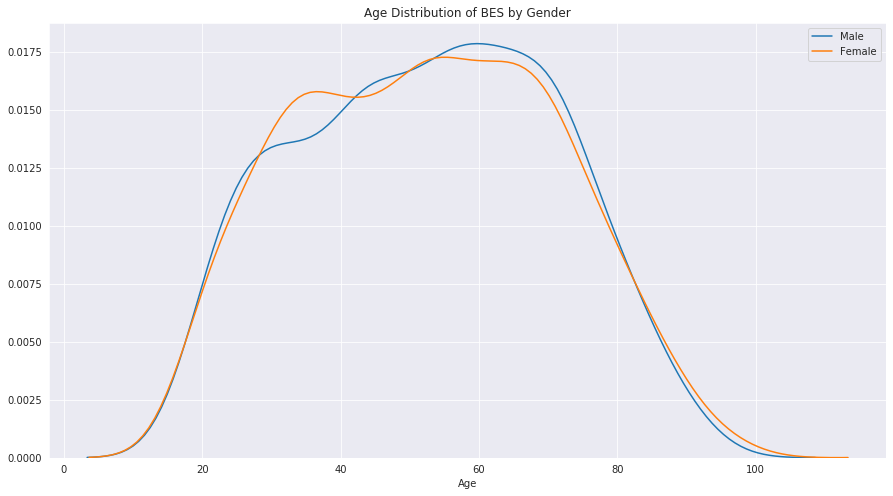

In [101]:
f, ax = plt.subplots(1, 1, figsize=(15, 8))
sns.distplot(bes_df[bes_df['y09'] == 'Male']
             ['Age'].dropna(), hist=False, label='Male')
sns.distplot(bes_df[bes_df['y09'] == 'Female']
             ['Age'].dropna(), hist=False, label='Female')
ax.legend()
ax.set_title("Age Distribution of BES by Gender")


Text(0.5, 1.0, 'BES Age Distribution by Region')

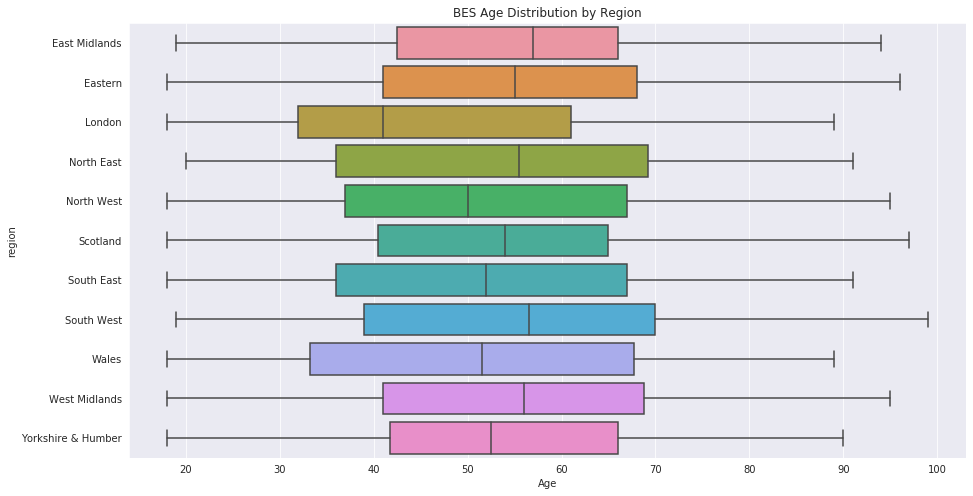

In [102]:
f, ax = plt.subplots(1, 1, figsize=(15, 8))
sns.boxplot(bes_df['Age'].dropna(), bes_df['region'])
ax.set_title("BES Age Distribution by Region")

To create the next figure, we'll need to draw on some of the advanced data manipulation techniques we learned last week.

I want to create a grouped bar plot showing the number of male and female respondents per region in the BES data.

In order to create this figure, I will need a _long-form_ dataframe, with the columns _region_, _gender_, and the per-region/gender count.

In [139]:
temp = bes_df.groupby(
    ['region', 'y09']
).apply(
    len
).reset_index(
).rename(
    {'y09': 'Gender',
     0: 'Count'},
    axis=1
)

temp

,region,Gender,Count
0,East Midlands,Male,74
1,East Midlands,Female,82
2,Eastern,Male,83
3,Eastern,Female,143
4,London,Male,93
5,London,Female,119
6,North East,Male,47
7,North East,Female,66
8,North West,Male,152
9,North West,Female,152


[Text(0, 0, 'East Midlands'),
 Text(0, 0, 'Eastern'),
 Text(0, 0, 'London'),
 Text(0, 0, 'North East'),
 Text(0, 0, 'North West'),
 Text(0, 0, 'Scotland'),
 Text(0, 0, 'South East'),
 Text(0, 0, 'South West'),
 Text(0, 0, 'Wales'),
 Text(0, 0, 'West Midlands'),
 Text(0, 0, 'Yorkshire & Humber')]

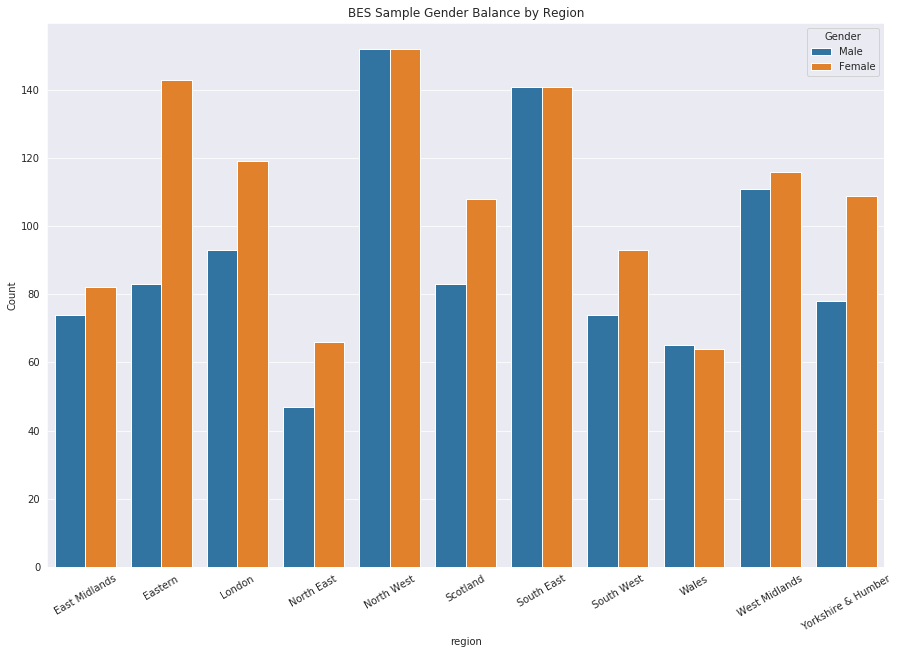

In [140]:
f, ax = plt.subplots(1, 1, figsize=(15, 10))

sns.barplot(data=temp, x='region', y='Count', hue='Gender')
ax.set_title("BES Sample Gender Balance by Region")
ax.xaxis.set_ticklabels(ax.xaxis.get_ticklabels(), rotation=30)

It's useful to create functions to do this for us as well.

In [149]:
def check_sample_balance(data, var1, var2):
    """
    Creates a grouped bar plot of the distribution of `var2` within each group of `var2`.
    TODO: Add arguments to rename the columns.
    """
    temp = data.groupby([var1, var2]).apply(len).reset_index().rename({0: 'Count'}, axis=1)
    f, ax = plt.subplots(1, 1, figsize=(len(data[var1].unique())*len(data[var1].unique())/5, 10))
    sns.barplot(data=temp, x=var1, y='Count', hue=var2)
    ax.set_title(f"BES Sample {var2} Balance by {var1}")
    ax.xaxis.set_ticklabels(ax.xaxis.get_ticklabels(), rotation=30)

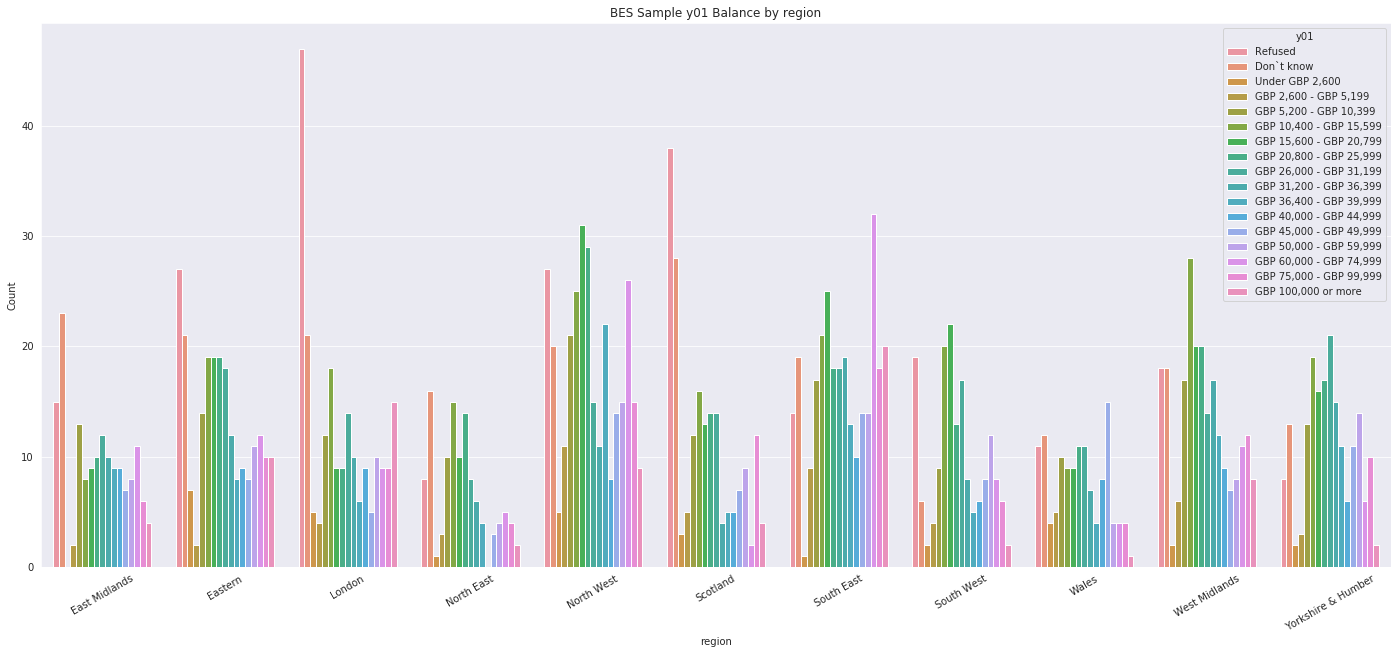

In [146]:
check_sample_balance(bes_df, 'region', 'y01')

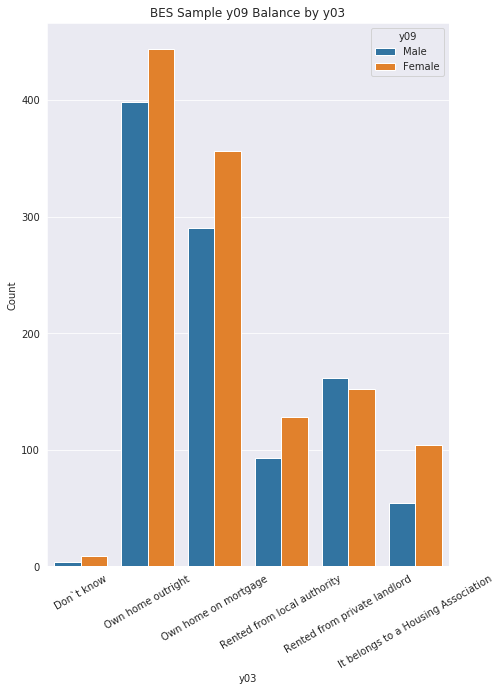

In [148]:
check_sample_balance(bes_df, 'y03', 'y09')

### Some Advanced Panelling

Less typing is better. Let's go through how we can panel a figure in `matplotlib` using for-loops.

In this example, I will create a figure that shows the per-region age distribution by male/female.

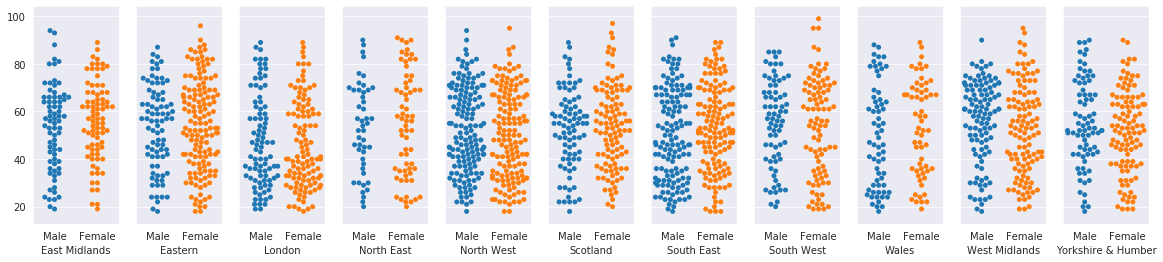

In [165]:
f, ax = plt.subplots(1, 11, figsize=(20, 4), sharey=True)

for i, region in enumerate(bes_df['region'].unique()):
    temp = bes_df[bes_df['region']==region]
    sns.swarmplot(temp['y09'], temp['Age'], ax=ax[i])
    ax[i].yaxis.set_label_text('', visible=False)
    ax[i].xaxis.set_label_text(region)

Want to go over multiple rows? No problem!

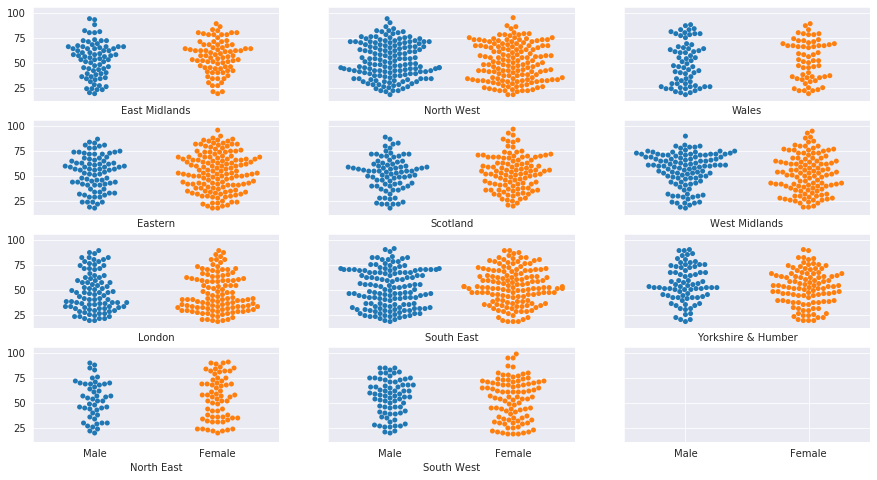

In [170]:
f, ax = plt.subplots(4, 3, figsize=(15, 8), sharey=True, sharex=True)

i = 0
j = 0
for region in bes_df['region'].unique():
    if i == 4:
        i = 0
        j += 1
    temp = bes_df[bes_df['region']==region]
    sns.swarmplot(temp['y09'], temp['Age'], ax=ax[i][j])
    ax[i][j].yaxis.set_label_text('', visible=False)
    ax[i][j].xaxis.set_label_text(region)
    i += 1

Much of this functionality, however, is contained within `sns.catplot`. I encourage you to check out the documentation on your own.

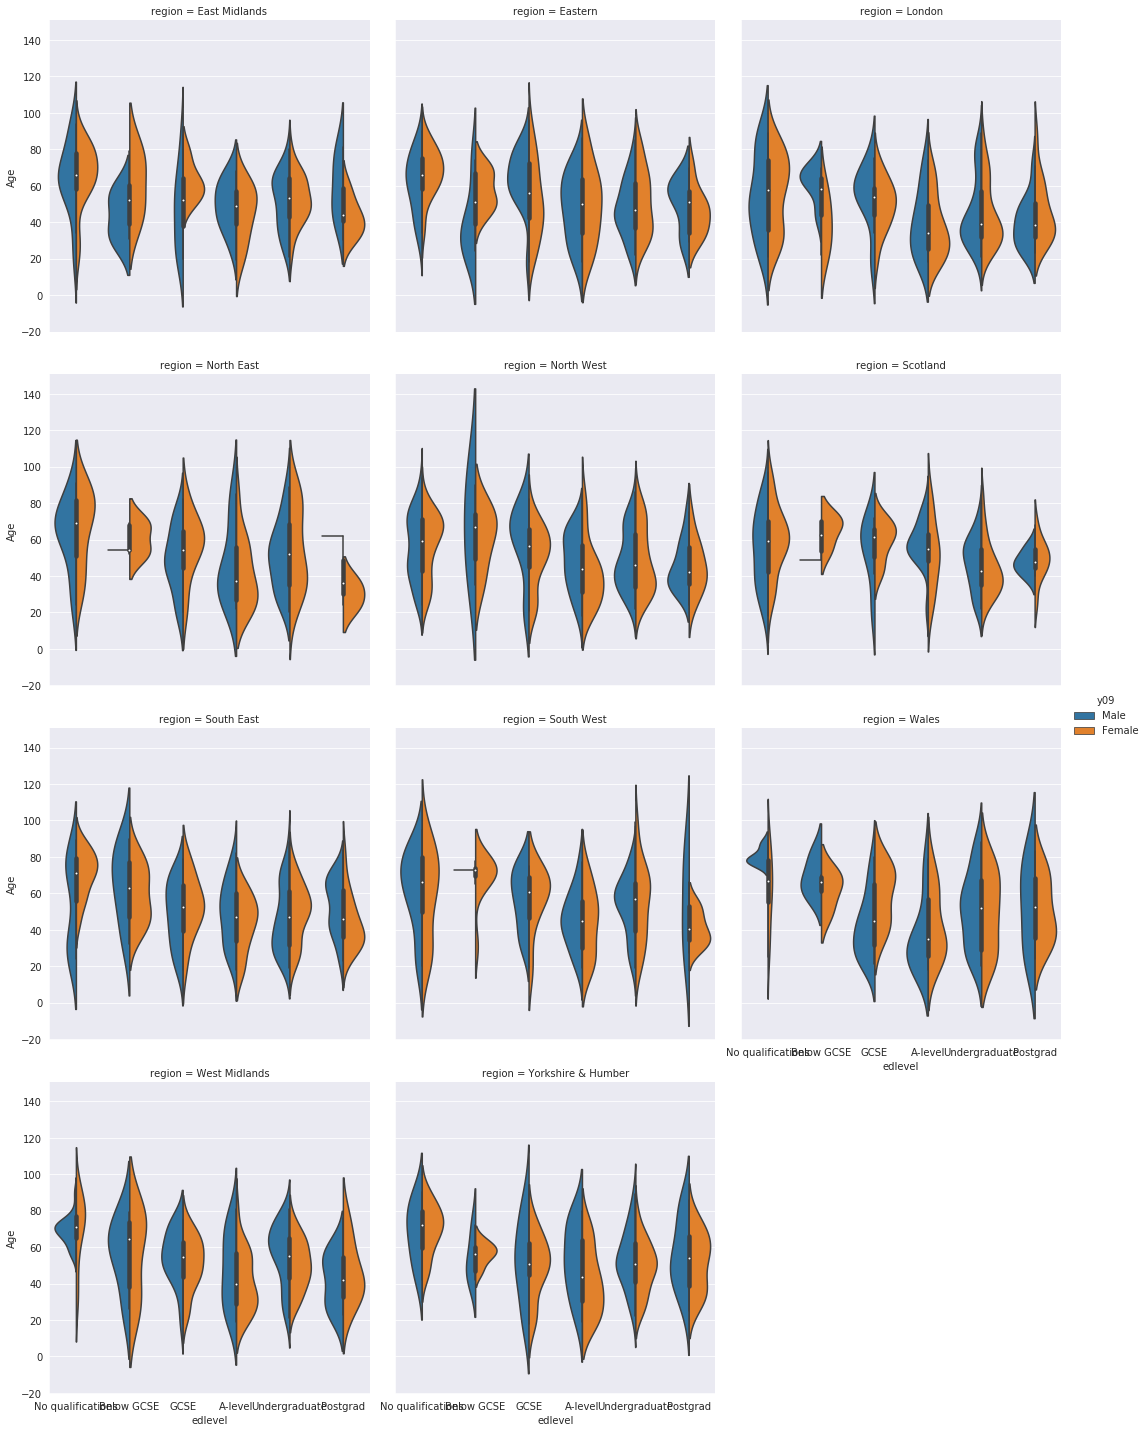

In [186]:
sns.catplot(data=bes_df, x='edlevel', hue='y09', col='region', y='Age', kind='violin', col_wrap=3, split=True)